# Image Manipulation

> Indented block



![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

In this tutorial, we will learn about:

* Image Thresholding
* Image Filtering (2D Convolution)   
* Image Gradients
  




## Google Colab

A quick and convinient way for learning Computer Vision and OpenCV is to use [Google Colab](https://colab.research.google.com/).

### Connect Google Drive to Colab


In [5]:
# import google driver
# You don't need to run this if you use the code locally
import cv2
import matplotlib.pyplot as plt

def cv2_imshow(img):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB))
    plt.show()

# Image Thresholding

For every pixel, the Image Thresholding applies same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function **cv.threshold** is used to apply the thresholding. The first argument is the source image, **which should be a grayscale image**. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type **cv.THRESH_BINARY**. All simple thresholding types are:

*  cv.THRESH_BINARY
*  cv.THRESH_BINARY_INV
*  cv.THRESH_TRUNC
*  cv.THRESH_TOZERO
*  cv.THRESH_TOZERO_INV

See [this documentation](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a19120b1a11d8067576cc24f4d2f03754) of the types for the differences.

The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.

This code compares the different simple thresholding types:

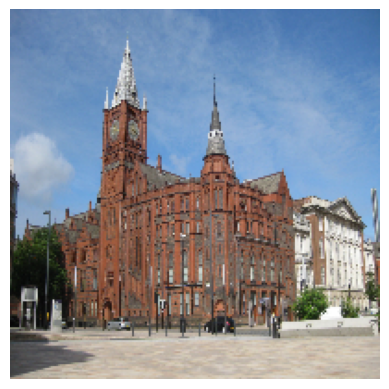

In [10]:
import numpy as np

# Read an image from the Drive
image = cv2.imread('victoria.png')  ## Change the image path if you place your image in different folder
image = cv2.resize(image, (200, 200)) # just resize the image to make it smaller for visualization


# show the image
cv2_imshow(image) ## use cv2.imshow("My Image", image) when you run the code locally

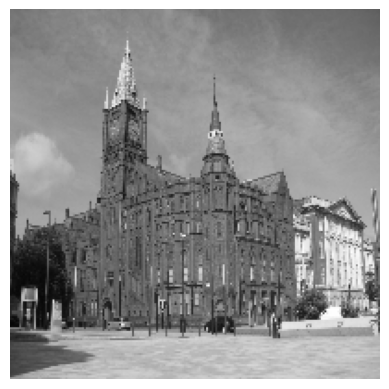

In [11]:
# convert the image to grayscale
output = image.copy()
gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

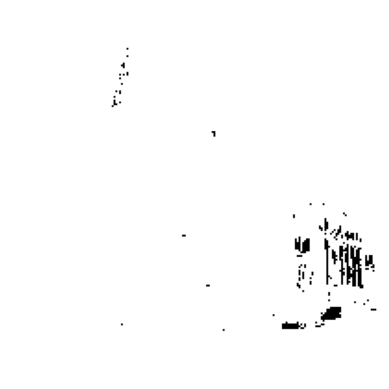

In [17]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)


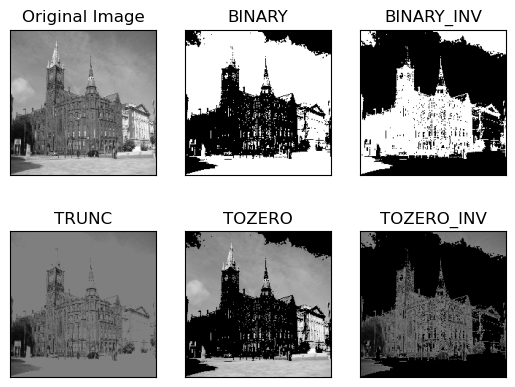

In [18]:
from matplotlib import pyplot as plt

ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Image Filtering (2D Convolution)   
OpenCV provides a function **cv.filter2D()** to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like the below:

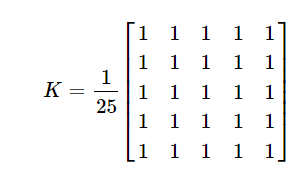

This code will apply the convolution operation to the image:

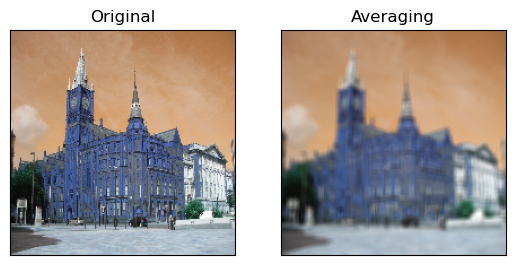

In [19]:
img = image.copy()

kernel = np.ones((5,5),np.float32)/25 # define the kernel/filter
dst = cv2.filter2D(img,-1,kernel)     # apply the filter

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian Blurring
In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, **cv.GaussianBlur()**. We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image. 

This code will call Gaussian blurring:

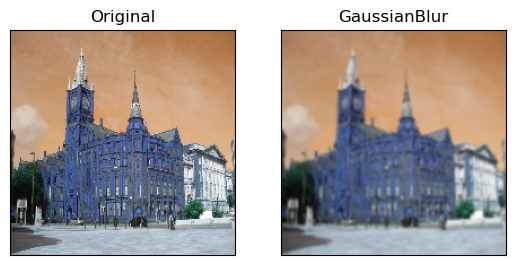

In [15]:
img = image.copy()

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Gradients
OpenCV provides two types of gradient filters Sobel and Laplacian. 

Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively).

It calculates the Laplacian of the image given by the relation:

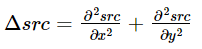

 where each derivative is found using Sobel derivatives. 
 


If ksize = 1, then following kernel is used for filtering:

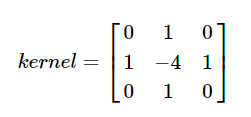

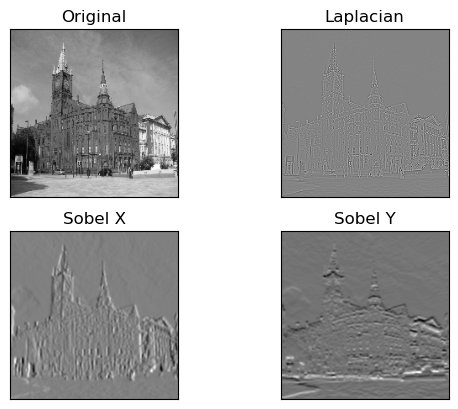

In [16]:
img = gray.copy()

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

# Self Practice (Optional)
1. [Image Convert] Convert the image into YUV image, and visualize the Y U V channel respectively.
2. [Gaussian Blurring] Please use different sizes of gaussian kernel (3\*3, 5\*5, 7\*7, 9\*9, 11\*11) to filter the image, and show all the filtered results. What kind of the conclusion can you draw with different gaussian kernels.
3. In this lab, we use OpenCV functions to understand the theory. All students are recommended to re-implement the functions **cv2.thereshold()** and **cv2.filter2D** as a self practice. 